# 1. Introduction to the dataset

Dataset comes from Ted Talks dataset on Kaggle. Analysis of the dataset references "Data Science Best Practices with pandas" tutorial by Data School.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("ted_main.csv")

In [3]:
data.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [4]:
data.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [5]:
data.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

# 2. Which talks provoke the most online discussion?

Look at which talks have the most comments

1. Consider the limitations and biases of your data when analyzing it
    > Limitation: only have first-level comments. Deeper-level comments show people replying and discussing about topic, showing more online discussion
    > Biases: older films would have more comments. Want to correct for this by normalizing by views (for how many people who view, will make a comment)
2. Make your results understandable
    > "Views per comment" easier to understand than "comments per view" since the latter in decimals

In [6]:
#Sorting by number of comments. Biased since older films have more comments
pivot1 = pd.pivot_table(data, values = "comments", index = "title")
pivot1sorted = pivot1.sort_values("comments",ascending = False)
pivot1sorted.head()

,comments
title,
Militant atheism,6404
Do schools kill creativity?,4553
Science can answer moral questions,3356
My stroke of insight,2877
How do you explain consciousness?,2673


In [7]:
#To correct for bias, we can normalize by views: create a new column "views per comment"
data["views_per_comment"] = round(data["views"]/data["comments"])
pivot2 = pd.pivot_table(data, values = "views_per_comment", index = "title")
pivot2sorted = pivot2.sort_values("views_per_comment",ascending = True)     #Want lowest number, reverse of "comments per view"
pivot2sorted.head()

,views_per_comment
title,
The case for same-sex marriage,451.0
E-voting without fraud,652.0
Militant atheism,683.0
Inside a school for suicide bombers,704.0
Taking imagination seriously,736.0


Therefore, "The case for same-sex marriage" takes 451 views for 1 comment. 1 out of 451 people who watched the talk comments on it.

# 3. Visualize the distribution of comments

1. Choose plot type based on the question you are answering and the data type(s) you are working with
     > Histogram: good for distributions
     > Barplots: good for comparing categories
     > Lineplots: good for time series data
     > Scatterplots: good for comparing multiple numeric variables
2. Use pandas one-liners to iterate through plots quickly (pandas is calling matplotlib under the hood)
     > generally faster to write pandas plots than matplotlib plots
     > but mostly relevant for exploratory plots, since limits to how much can customize w/o using matplotlib
3. Trying modifying plot defaults to make plot as informative as possible
4. Creating plots involves decision making
     > Since can't show everything on a visualization, a visualization is a summary
     > decision should based on "How can I accurately answer this question?"

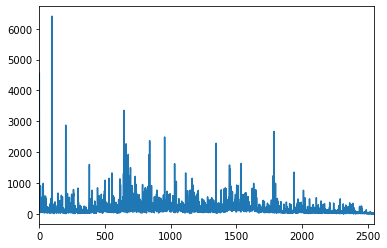

In [8]:
data.comments.plot()        #inside parenthesis, shift tab 4 times to get documentation

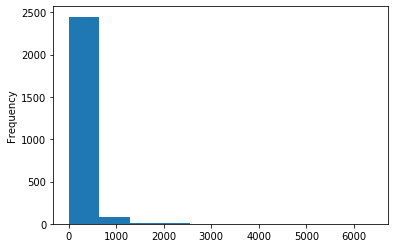

In [9]:
data.comments.plot(kind = 'hist') 

Most talks have fewer than 1000 comments, but what is the distribution like within the first bar? Let's filter the data to talks with fewer than 1000 comments.

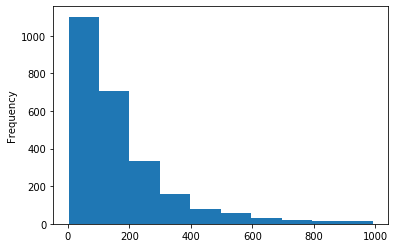

In [10]:
data[data.comments < 1000].comments.plot(kind = 'hist') 

In [11]:
data[data.comments > 1000].shape                  

(31, 18)

We are only losing 31 datapoints when we filter by talks with fewer than 1000 comments.

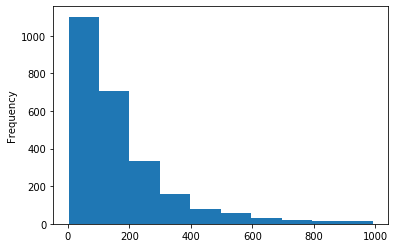

In [12]:
#Can filter the same way using loc
#select rows I want, cols I want
data.loc[data.comments < 1000, "comments"].plot(kind = "hist")

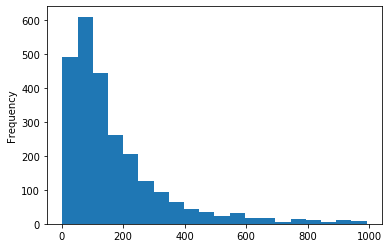

In [13]:
#increasing number of bins, from default of 10
data.loc[data.comments < 1000, "comments"].plot(kind = "hist", bins = 20)

# 4. Plot the number of talks that took place each year

1. Read the documentation
    > to the dataset and to pandas
2. Use the datetime data type for dates and times
    > works well with plots and provides convenient attributes
3. Check your work as you go  
    > eg. using random samples, rather than head or tail
4. Consider excluding data if it might not be relevant
    > Partial data for 2017, might want to exclude that, depends on what you want to show

In [14]:
#Need to create a year column. Let's explore the event column
data.event.sample(10)                           #take random sample of 10

2455              TED2017
1957            TEDxKyoto
1348       TEDGlobal 2012
159               TED2007
181               TED2007
2122        TEDWomen 2015
172               TED2007
1752      TEDSalon NY2014
1643    TED@BCG Singapore
2416      TEDxMidAtlantic
Name: event, dtype: object

Event column does not work since not all have years. Let's try the film_date column instead.

In [15]:
data['film_datetime'] = pd.to_datetime(data.film_date, unit = "s")               #to convert unix to datetime

In [16]:
#check if it worked
data[['event','film_datetime']].sample(5)

,event,film_datetime
1405,TEDxJaffa 2012,2012-09-06
2233,TED2016,2016-02-16
1725,TED2014,2014-03-19
673,Mission Blue Voyage,2010-04-08
1838,TEDGlobal 2014,2014-10-07


In [17]:
#use .dt to extract different things from datetime: data.film_datetime.dt.year/ data.film_datetime.dt.dayofweek 
data.film_datetime.dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

In [18]:
#use value_count everytime want to count values
data.film_datetime.dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: film_datetime, dtype: int64

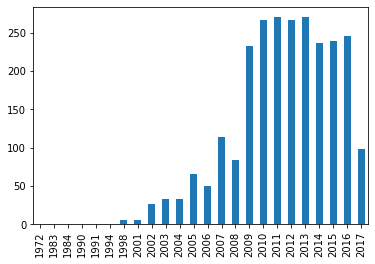

In [19]:
data.film_datetime.dt.year.value_counts().sort_index().plot(kind="bar")

Bar plot isn't very ideal since we can't see 1972 very clearly.

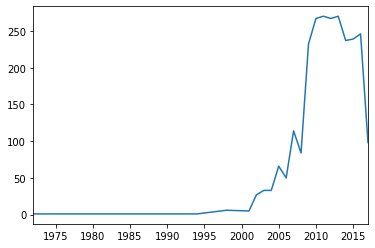

In [20]:
data.film_datetime.dt.year.value_counts().sort_index().plot(kind="line")

In [21]:
#Is there a sharp drop in 2017?
data.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

We see that data in 2017 ends in August and is therefore incomplete.

# 5. What were the "best" events in TED history to attend?

In [26]:
#we need to define what is "best", perhaps this means events with most no of talks
data["event"].value_counts().sort_values(ascending=False).head(5)

TED2014    84
TED2009    83
TED2016    77
TED2013    77
TED2015    75
Name: event, dtype: int64

In [78]:
#need to talk into account quality, can see number of views for shows
eventpivot = data.pivot_table(index = "event", values = "views", aggfunc = ["count","mean","sum"])         #add count to see number of talks since views may be biased towards events with many talks. sum to see total number of views
eventpivot.head(5)

,count,mean,sum
,views,views,views
event,,,
AORN Congress,1,149818.0,149818
Arbejdsglaede Live,1,971594.0,971594
BBC TV,1,521974.0,521974
Bowery Poetry Club,1,676741.0,676741
Business Innovation Factory,3,304086.0,912258


In [74]:
eventpivot.columns = eventpivot.columns.get_level_values(0)       #rename columns to first level column names, for sort_values to work

In [77]:
eventpivot.sort_values("sum", ascending = False).head(5)

,count,mean,sum
event,,,
TED2013,77,2.302700e+06,177307937
TED2014,84,2.072874e+06,174121423
TEDGlobal 2013,66,2.584163e+06,170554736
TED2015,75,2.011017e+06,150826305
TED2006,45,3.274345e+06,147345533


We can see that TED2013 has the most views. However, views as a metric is still flawed and may not best represent event talk quality. Therefore, we will look at ratings data next.

# 6. Unpack the ratings data

1. Pay attention to data types in pandas
    > affect pandas functionality, should know at all times what data type to know what functions can or cannot use
2. Use apply when necessary
    > Usually used last as it is slow compared to built-in pandas functions

In [79]:
data.ratings.head(5)

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [80]:
data.loc[0,"ratings"]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [84]:
type(data.loc[0,"ratings"])

str

In [89]:
import ast                        #abstract syntax tree
ast.literal_eval('[1,2,3]')       #if pass string, returns list

list

In [90]:
ast.literal_eval(data.loc[0,"ratings"])         #unpack list inside first value of ratings. Want to do it for entire column.

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [91]:
def str_to_list(ratings_str):                     #take ratings string and convert to list
    return ast.literal_eval(ratings_str)

In [92]:
str_to_list(data.loc[0,"ratings"])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [93]:
data.ratings.apply(str_to_list).head(5)            #apply function to entire column/series

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [94]:
data["ratings_list"] = data.ratings.apply(lambda x: ast.literal_eval(x))

In [95]:
data.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

# 7. Count the total number of ratings received by each talk

In [115]:
def get_num_ratings(list_of_dicts):
    
    num  = 0
    for d in list_of_dicts:          #for each dictionary
        num += d['count']            
    
    return num

In [116]:
get_num_ratings(data.ratings_list[0])

93850

In [118]:
data['num_ratings'] = data.ratings_list.apply(get_num_ratings)

In [119]:
data.num_ratings.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

In [129]:
pd.DataFrame(data.ratings_list[0])['count'].sum()                    #if column name conflicts with inbuilt function, cannot use dot notation for column "count"

93850

# 8. Which occupations deliver the funniest TED talks on average?

### Step 1: count the number of funny ratings

In [136]:
data.ratings.str.contains('Funny').value_counts()            #can see that all rows have 'Funny'

True    2550
Name: ratings, dtype: int64

In [140]:
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name']== 'Funny':
            return d['count']

In [143]:
data['funny_ratings'] = data.ratings_list.apply(get_funny_ratings)

In [145]:
data['funny_rate'] = data.funny_ratings/ data.num_ratings

### Step 2: compare funny rate with speaker occupation to see if it makes sense

In [146]:
data.sort_values('funny_rate').speaker_occupation.tail(20)         #compare funny rate with speaker occupation to see if it makes sense

1849                       Science humorist
337                                Comedian
124     Performance poet, multimedia artist
315                                  Expert
1168             Social energy entrepreneur
1468                          Ornithologist
595                  Comedian, voice artist
1534                         Cartoon editor
97                                 Satirist
2297                          Actor, writer
568                                Comedian
675                          Data scientist
21                     Humorist, web artist
194                                Jugglers
2273                    Comedian and writer
2114                    Comedian and writer
173                                Investor
747                                Comedian
1398                               Comedian
685             Actor, comedian, playwright
Name: speaker_occupation, dtype: object

Sorted by ascending order, therefore bottom has highest funny rate.

### Step 3: Analyze the funny rate by occupation

In [154]:
data.pivot_table(index = "speaker_occupation", values = "funny_rate").sort_values("funny_rate").tail(5)

,funny_rate
speaker_occupation,
Comedian,0.512457
"Actor, writer",0.515152
"Actor, comedian, playwright",0.558107
Jugglers,0.566828
Comedian and writer,0.602085


In [156]:
data.speaker_occupation.describe()

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

Shows small sample size, along with duplicates.

### Step 4: Focus on occupations that are well-represented in the data

In [158]:
occupation_counts = data.speaker_occupation.value_counts()

In [165]:
top_occupations = occupation_counts.loc[occupation_counts>=5].index

In [167]:
data_top_occupations = data[data.speaker_occupation.isin(top_occupations)]    #filter by data where speaker occupation is in top_occupations

In [168]:
data_top_occupations.shape

(786, 23)

In [172]:
data_top_occupations.pivot_table(index = "speaker_occupation", values = "funny_rate").sort_values("funny_rate")

,funny_rate
speaker_occupation,
Surgeon,0.002465
Physician,0.004515
Photojournalist,0.004908
Investor and advocate for moral leadership,0.005198
Photographer,0.007152
"Environmentalist, futurist",0.007317
Violinist,0.009534
Singer-songwriter,0.010597
Chemist,0.010970
